## Hypothesis Testing using ANOVA

Source: 

1. https://www.analyticsvidhya.com/blog/2020/06/introduction-anova-statistics-data-science-covid-python/
2. https://www.pythonfordatascience.org/anova-python/


In [102]:
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/difficile.csv")
df.head()

,person,dose,libido
0,1,1,3
1,2,1,2
2,3,1,1
3,4,1,1
4,5,1,4


A new medication was developed to increase the libido of those who take the medication. The purpose of this study was to test for a difference between the dosage levels. There are 3 dosage levels - 1= 'placebo', 2='low', 3='high'. 

In [105]:
df.groupby(['dose']).mean()['libido']

dose
1    2.2
2    3.2
3    5.0
Name: libido, dtype: float64

In [107]:
df_1=df[df['dose']==1]
df_2=df[df['dose']==2]
df_3=df[df['dose']==3]

Seems like taking high dosage of the medication has led to increase in libido values but we will confirm this with one way ANOVA

In [110]:
#checking the assumptions of ANOVA
#Normal distribution, equal variances, equal sample sizes

from scipy.stats import shapiro

def check_normality(df):
    stat,p_value=shapiro(df)

    if p_value<=0.05:
        print("P_value is {}. Reject null hypothesis: Data is not drawn from normal distribution".format(p_value))
    else:
        print("P value is {}.Fail to reject null hypothesis: Data is drawn from normal distribution".format(p_value))
    

check_normality(df_1['libido'])
check_normality(df_2['libido'])
check_normality(df_3['libido'])

P value is 0.421149343252182.Fail to reject null hypothesis: Data is drawn from normal distribution
P value is 0.421149343252182.Fail to reject null hypothesis: Data is drawn from normal distribution
P value is 0.9671739339828491.Fail to reject null hypothesis: Data is drawn from normal distribution


In [111]:
#equal variances

from scipy.stats import levene

stat,p_value=levene(df_1['libido'],df_2['libido'],df_3['libido'])

if p_value<=0.05:
    print("Reject null hypothesis: All groups have different variances")
else:
    print("Failure to reject null hypothesis: All groups have equal variances")

Failure to reject null hypothesis: All groups have equal variances


Here, we have equal variances but if we didn't then there are different ways to handle heteroskedasticity (unequal variance) and a decision needs to be made. Some options include, but is not limited to, transformming the dependent variable (outcome), could use trimmed means, robust standard errors, or use a parametric test suchs as the Welch's t-test. 

In [112]:
#since assumptions are met, we will continue with one way ANOVA

from scipy.stats import f_oneway

stat,p_value=f_oneway(df_1['libido'],df_2['libido'],df_3['libido'])

if p_value<=0.05:
    print("P value is {}.Reject null hypothesis: There is a statistically significant difference between the groups".format(p_value))
else:
    print("P value is {}.Failure to reject null hypothesis: There is NO statistically significant difference between the groups".format(p_value))

P value is 0.024694289538222603.Reject null hypothesis: There is a statistically significant difference between the groups


#### Post Hoc Testing

By conducting post-hoc tests or planned comparisons it allows one to see which group(s) significantly differ from each other. We will use TUKEY HONESTLY SIGNIFICANT DIFFERENCE (HSD).

In [114]:
import statsmodels.stats.multicomp as mc

comp=mc.MultiComparison(df['libido'],df['dose'])
post_hoc_res=comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,1.0,0.5171,-1.3651,3.3651,False
1,3,2.8,0.0209,0.4349,5.1651,True
2,3,1.8,0.1472,-0.5651,4.1651,False


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


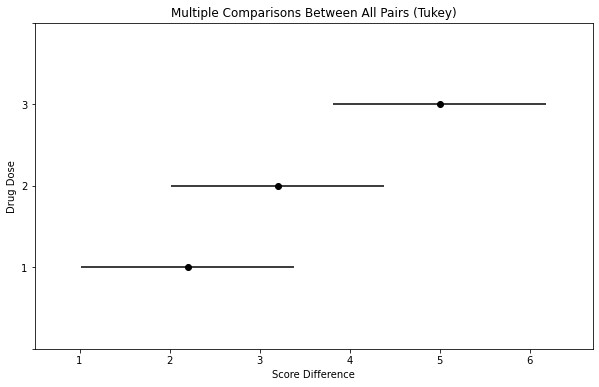

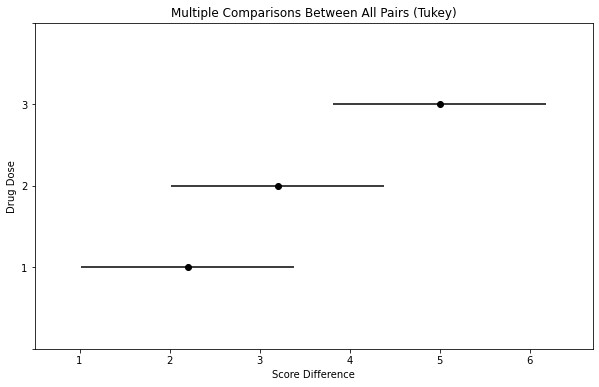

In [115]:
post_hoc_res.plot_simultaneous(ylabel= "Drug Dose", xlabel= "Score Difference")

Using Tukey HSD to test for differences between groups indicates that there is a statistically significant difference in libido score between those who took the placebo and those who took the high dosage of the medication, no other groups differed significantly. What this indicates is that the high dosage of the medication is effective at increasing libido, but the low dosage is not.